# Linear Regression on House Prices with XGBoost

In [1]:
keras_actif = True # Active Keras ou XGBoost
if keras_actif:
    xgb_actif = False
else:
    xgb_actif = True

## Preprocess data

In [2]:
import pandas as pd
import numpy as np
from numpy import transpose
from numpy import append
from numpy import reshape
import matplotlib.pyplot as plt
# %matplotlib notebook
import seaborn as sns

np.random.seed(42)
# tf.random.set_seed(42)
pd.set_option('display.max_columns', 100)

In [3]:
data = pd.read_csv('sources/clean_train.csv')
data.drop('Id',axis = 1, inplace = True)

data_test = pd.read_csv('sources/clean_test.csv')
data_test_id = data_test['Id']
data_test.drop('Id',axis = 1, inplace = True)

print(f"Shape data : {data.shape}")
print('')
print(f"Shape data_test : {data_test.shape}")

Shape data : (1457, 222)

Shape data_test : (1459, 221)


### Extract SalePrice from data

In [4]:
if 'SalePrice' in data.columns:
    Y_train = data['SalePrice'].to_numpy()
    Y_train = Y_train.reshape(Y_train.shape[0],1)
    del data['SalePrice']

X_train = data.to_numpy()
X_test = data_test.to_numpy()

print(f"X train {X_train.shape}")
print(f"Y train {Y_train.shape}")
print(f"X test {X_test.shape}")

X train (1457, 221)
Y train (1457, 1)
X test (1459, 221)


### Scale features

"Normalizing" the data should help prevent values from "exploding":

In [5]:
scale_data = True
if scale_data:
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
    scaler_Y = scaler.fit(Y_train)
    Y_train = scaler_Y.transform(Y_train)
    
print(f"X train {X_train.shape}")
print(f"Y train {Y_train.shape}")
print(f"X test {X_test.shape}")

X train (1457, 221)
Y train (1457, 1)
X test (1459, 221)


## Modelling

### Keras

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               28416     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 28,545
Trainable params: 28,545
Non-trainable params: 0
_________________________________________________________________
None
Train on 1457 samples
Epoch 1/300
1457/1457 [==============================] - 2s 1ms/sample - loss: 1.1554
Epoch 2/300
1457/1457 [==============================] - 0s 188us/sample - loss: 0.5759
Epoch 3/300
1457/1457 [==============================] - 0s 189us/sample - loss: 0.3839
Epoch 4/300
1457/1457 [==============================] - 0s 199us/sample - loss: 0.2788
Epoch 5/300
1457/1457 [==============================]

1457/1457 [==============================] - 0s 188us/sample - loss: 0.0079
Epoch 82/300
1457/1457 [==============================] - 0s 187us/sample - loss: 0.0070
Epoch 83/300
1457/1457 [==============================] - 0s 185us/sample - loss: 0.0066
Epoch 84/300
1457/1457 [==============================] - 0s 185us/sample - loss: 0.0071
Epoch 85/300
1457/1457 [==============================] - 0s 185us/sample - loss: 0.0059
Epoch 86/300
1457/1457 [==============================] - 0s 187us/sample - loss: 0.0066
Epoch 87/300
1457/1457 [==============================] - 0s 184us/sample - loss: 0.0061
Epoch 88/300
1457/1457 [==============================] - 0s 186us/sample - loss: 0.0052
Epoch 89/300
1457/1457 [==============================] - 0s 189us/sample - loss: 0.0044
Epoch 90/300
1457/1457 [==============================] - 0s 190us/sample - loss: 0.0048
Epoch 91/300
1457/1457 [==============================] - 0s 192us/sample - loss: 0.0049
Epoch 92/300
1457/1457 [==========

1457/1457 [==============================] - 0s 186us/sample - loss: 0.0053
Epoch 173/300
1457/1457 [==============================] - 0s 187us/sample - loss: 0.0051
Epoch 174/300
1457/1457 [==============================] - 0s 188us/sample - loss: 0.0058
Epoch 175/300
1457/1457 [==============================] - 0s 185us/sample - loss: 0.0056
Epoch 176/300
1457/1457 [==============================] - 0s 186us/sample - loss: 0.0055
Epoch 177/300
1457/1457 [==============================] - 0s 192us/sample - loss: 0.0050
Epoch 178/300
1457/1457 [==============================] - 0s 211us/sample - loss: 0.0044
Epoch 179/300
1457/1457 [==============================] - 0s 210us/sample - loss: 0.0049
Epoch 180/300
1457/1457 [==============================] - 0s 208us/sample - loss: 0.0053
Epoch 181/300
1457/1457 [==============================] - 0s 207us/sample - loss: 0.0058
Epoch 182/300
1457/1457 [==============================] - 0s 207us/sample - loss: 0.0050
Epoch 183/300
1457/1457 

1457/1457 [==============================] - 0s 223us/sample - loss: 0.0050
Epoch 264/300
1457/1457 [==============================] - 0s 202us/sample - loss: 0.0037
Epoch 265/300
1457/1457 [==============================] - 0s 242us/sample - loss: 0.0028
Epoch 266/300
1457/1457 [==============================] - 0s 214us/sample - loss: 0.0031
Epoch 267/300
1457/1457 [==============================] - 0s 198us/sample - loss: 0.0044
Epoch 268/300
1457/1457 [==============================] - 0s 198us/sample - loss: 0.0044
Epoch 269/300
1457/1457 [==============================] - 0s 191us/sample - loss: 0.0039
Epoch 270/300
1457/1457 [==============================] - 0s 191us/sample - loss: 0.0037
Epoch 271/300
1457/1457 [==============================] - 0s 189us/sample - loss: 0.0040
Epoch 272/300
1457/1457 [==============================] - 0s 195us/sample - loss: 0.0037
Epoch 273/300
1457/1457 [==============================] - 0s 191us/sample - loss: 0.0039
Epoch 274/300
1457/1457 

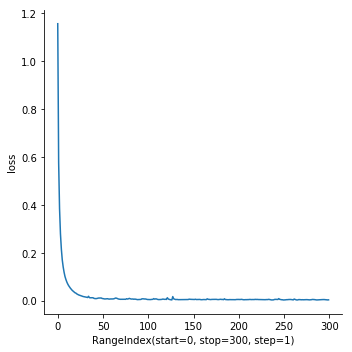

In [6]:
if keras_actif:
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Input
    from tensorflow.keras.layers import Dense
    model = Sequential()
    model = Sequential([
        Input(shape=X_train.shape[1:]),
        Dense(28, activation='sigmoid'),
        Dense(14, activation='sigmoid'),
        Dense(1)
    ])
    print(model.summary())
    
    from tensorflow.keras.optimizers import Adam
    model.compile(
        loss='mean_squared_error',
        optimizer=Adam(learning_rate=0.00014, beta_1=0.9, beta_2=0.999, amsgrad=False)
    )

    BATCH_SIZE = 13 #
    EPOCHS = 300 # how many iterations over the whole dataset
    history = model.fit(X_train, Y_train, epochs=EPOCHS, batch_size=BATCH_SIZE)

    hist = pd.DataFrame(history.history)
    sns.relplot(x=hist.index, y='loss', kind='line', data=hist)
    
# BigML
# "network1": {
#     "learn_residuals": false,
#     "dropout_rate": 0,
#     "activation_functions": [
#         "sigmoid",
#         "sigmoid"
#     ],
#     "layer_sizes": [
#         28,
#         14
#     ],
#     "descent_algorithm": "adam",
#     "learning_rate": 0.00014,
#     "batch_size": 13,
#     "seed": "0-1-2-3-4-5-6-7-8-9-10-cand-1990",
#     "beta2": 0.999,
#     "beta1": 0.9,
#     "epsilon": 0,
#     "tree_embedding": false,
#     "max_training_time": 38964.64948,
#     "batch_normalization": false,
#     "outputs": 1
# },

### XGBRegressor

In [7]:
if xgb_actif:
    import xgboost as xgb
    
    optimisation_gridsearchCV = False
    if optimisation_gridsearchCV:
        from sklearn.model_selection import GridSearchCV
        gb_model = xgb.XGBRegressor(objective='reg:squarederror')
        params = {
            'kernel':('linear', 'poly', 'poly', 'rbf', 'rbf'),
            'min_child_weight':[4,5],
            'gamma':[i/10.0 for i in range(3,6)],
            'subsample':[i/10.0 for i in range(6,11)],
            'colsample_bytree':[i/10.0 for i in range(6,11)],
            'max_depth': [2,3,4]
        }

        xgb_model = GridSearchCV(xgb_model, params)
        xgb_model.fit(X_train, Y_train)

        xgb_model.best_estimator_
    else:
        xgb_model = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0.3,
             importance_type='gain', kernel='linear', learning_rate=0.1,
             max_delta_step=0, max_depth=3, min_child_weight=4, missing=None,
             n_estimators=100, n_jobs=1, nthread=None,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
             subsample=0.8, verbosity=1)
        
        xgb_model.fit(X_train, Y_train)
    
    optimisation_flow = False
    if optimisation_flow:
        from sklearn import metrics
        from sklearn.model_selection import train_test_split
        X_split_train,X_split_test, y_split_train, y_split_test = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)
        xgb_split = xgb.XGBRegressor()
        XgBoost = xgb_split.fit(X_split_train, y_split_train)
        Y_train_pred_80 = xgb_split.predict(X_split_train) # Prediction sur train (80%)
        Y_train_pred_20 = xgb_split.predict(X_split_test) # Prediction sur val (20%)

        print(' > Results on train :')
#         print(' >> RMSLE : ', np.sqrt(metrics.mean_squared_log_error(y_split_train, Y_train_pred_80)))
        print(' >> MAE : ', metrics.mean_absolute_error(y_split_train, Y_train_pred_80))
        print()

        print (' > Results on val :')
#         print(' >> RMSLE : ', np.sqrt(metrics.mean_squared_log_error(y_split_test, Y_train_pred_20)))
        print(' >> MAE : ', metrics.mean_absolute_error(y_split_test, Y_train_pred_20))
        print()    

## Prepare for Kaggle submisison

In [8]:
if keras_actif:
    Y_test = model.predict(x=X_test)
if xgb_actif:
    Y_test = xgb_model.predict(X_test)

Y_test = np.exp(scaler_Y.inverse_transform(Y_test))
Y_test = np.reshape(Y_test, Y_test.shape[0],)

In [9]:
data_test['Id'] = data_test_id
data_test['SalePrice'] = Y_test

name_scale = ''
if scale_data:
    name_scale = '_Scale'
    
name_algo = '_XGBRegressor'
if keras_actif:
    name_algo = '_Keras'
data_test.drop(data_test.columns.difference(['Id','SalePrice']), 1, inplace=True)
data_test.to_csv(f'storage/allfeatures{name_algo}{name_scale}.csv', index=False)